In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
import pickle
with open('C:/Users/Jardi/Documents/Cursos/Machine Learning/recursos do curso/Bases de dados/credit.pkl','rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [5]:
import numpy as np

In [8]:
x_credit=np.concatenate((x_credit_treinamento,x_credit_teste),axis=0)

In [9]:
y_credit = np.concatenate((y_credit_treinamento,y_credit_teste),axis=0)

In [ ]:
#Arvore de decisão

In [10]:
parametros={'criterion':['gini','entropy'],
           'splitter':['best','ramdom'],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,5,10]}

In [11]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parametros)
grid_search.fit(x_credit,y_credit)
melhores_parametros=grid_search.best_params_
melhor_resultado=grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


C:\Users\Jardi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jardi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jardi\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Jardi\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Jardi\anaconda3\lib\site-packages

In [ ]:
#Random Forest

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
parametros={'criterion':['gini','entropy'],
           'n_estimators':[10,40,100,150],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,5,10]}

In [14]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=parametros)

In [15]:
grid_search.fit(x_credit,y_credit)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 40, 100, 150]})

In [16]:
mp=grid_search.best_params_
mr=grid_search.best_score_
print(mp)
print(mr)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9870000000000001


In [ ]:
#KNN

In [17]:
from sklearn.model_selection import GridSearchCV

In [20]:
parametros = {'n_neighbors': [3,5,10,20],
             'p':[1,2]}

In [23]:
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parametros)

In [24]:
grid_search.fit(x_credit,y_credit)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20], 'p': [1, 2]})

In [25]:
mp=grid_search.best_params_
mr=grid_search.best_score_
print(mp)
print(mr)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


In [ ]:
#Regressão Logistica

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
parametros={'tol': [0.0001,0.00001,0.000001],
           'C':[1.0,1.5,2.0],
           'solver':['lbfgs','sag','saga']}

In [31]:
grid_search=GridSearchCV(estimator=LogisticRegression(),param_grid=parametros)

In [32]:
grid_search.fit(x_credit,y_credit)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 1.5, 2.0],
                         'solver': ['lbfgs', 'sag', 'saga'],
                         'tol': [0.0001, 1e-05, 1e-06]})

In [33]:
mp=grid_search.best_params_
mr=grid_search.best_score_
print(mp)
print(mr)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


In [ ]:
#SVC

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parametros={'tol': [0.001,0.0001,0.00001],
           'C':[1.0,1.5,2.0],
           'kernel':['rbf','linear','poly']}

In [38]:
grid_search=GridSearchCV(estimator=SVC(), param_grid=parametros)

In [39]:
grid_search.fit(x_credit,y_credit)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 1.5, 2.0],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'tol': [0.001, 0.0001, 1e-05]})

In [40]:
mp=grid_search.best_params_
mr=grid_search.best_score_
print(mp)
print(mr)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


In [ ]:
#Redes Neurais

In [41]:
parametros={'activation': ['relu','logistic','tahn'],
           'solver':['adam','sgd'],
           'batch_size':[10,56]}

In [42]:
grid_search=GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)

In [43]:
grid_search.fit(x_credit,y_credit)

C:\Users\Jardi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Jardi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Jardi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Jardi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Jardi\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic', 'tahn'],
                         'batch_size': [10, 56], 'solver': ['adam', 'sgd']})

In [44]:
mp=grid_search.best_params_
mr=grid_search.best_score_
print(mp)
print(mr)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9964999999999999


### VALIDAÇÃO CRUZADA ####

In [45]:
from sklearn.model_selection import cross_val_score, KFold

In [54]:
resultados_arvore = []
resultados_random_forest=[]
resultados_knn=[]
resultados_svm=[]
resultados_rede=[]
resultados_logistic=[]

for i in range (30):
    kfold = KFold(n_splits=10,shuffle=True,random_state=i)
    
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1,min_samples_split=5,splitter='best')
    scores = cross_val_score(arvore,x_credit,y_credit,cv=kfold)
    resultados_arvore.append(scores.mean())
    
    random_forest = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())
    
    knn = KNeighborsClassifier(n_neighbors= 20, p= 1)
    scores=cross_val_score(knn,x_credit,y_credit,cv=kfold)
    resultados_knn.append(scores.mean())
    
    logistic = LogisticRegression(C=1.0, solver= 'lbfgs', tol= 0.0001)
    scores = cross_val_score(logistic,x_credit,y_credit,cv=kfold)
    resultados_logistic.append(scores.mean())
    
    svm = SVC(C= 1.5, kernel='rbf', tol= 0.001)
    scores=cross_val_score(svm,x_credit,y_credit,cv=kfold)
    resultados_svm.append(scores.mean())
    
    redes=MLPClassifier(activation= 'relu', batch_size= 10, solver= 'adam')
    scores=cross_val_score(redes,x_credit,y_credit,cv=kfold)
    resultados_rede.append(scores.mean())
    
    

In [56]:
import pandas as pd

In [58]:
resultados = pd.DataFrame({'Arvore':resultados_arvore,'Random forest':resultados_random_forest,'Rede neural':resultados_rede})

In [59]:
resultados

,Arvore,Random forest,Rede neural
0,0.9865,0.9885,0.9950
1,0.9855,0.9860,0.9975
2,0.9905,0.9900,0.9975
3,0.9880,0.9860,0.9955
4,0.9880,0.9875,0.9950
5,0.9890,0.9870,0.9970
6,0.9880,0.9885,0.9965
7,0.9875,0.9865,0.9970
8,0.9865,0.9880,0.9975
9,0.9870,0.9895,0.9960


In [60]:
resultados.describe()

,Arvore,Random forest,Rede neural
count,30.000000,30.000000,30.000000
mean,0.987233,0.987167,0.996383
std,0.001755,0.001302,0.000944
min,0.982000,0.985500,0.994000
25%,0.986500,0.986125,0.995625
50%,0.987250,0.987000,0.996500
75%,0.988000,0.987500,0.997000
max,0.990500,0.990000,0.998000


In [ ]:
#####Teste de normalidade nos resultados

In [61]:
alpha=0.05

In [62]:
from scipy.stats import shapiro

In [63]:
shapiro(resultados_arvore),shapiro(resultados_random_forest),shapiro(resultados_rede)

(ShapiroResult(statistic=0.9485703017660433, pvalue=0.15477176756954525),
 ShapiroResult(statistic=0.9174676614875513, pvalue=0.023067501174364485),
 ShapiroResult(statistic=0.9454299578366444, pvalue=0.12740743866186904))

In [64]:
import seaborn as sns

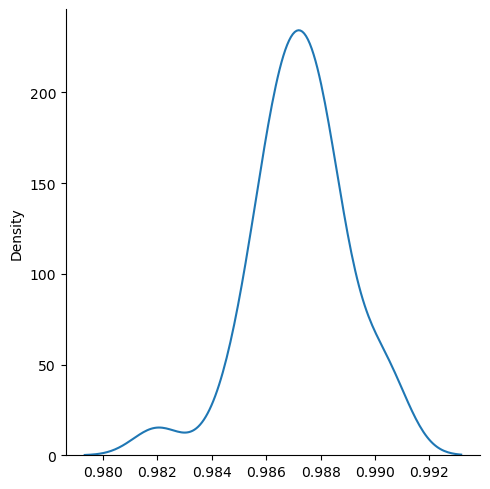

In [65]:
sns.displot(resultados_arvore, kind='kde')

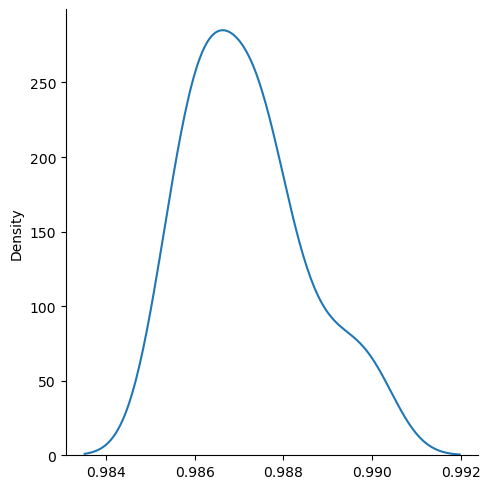

In [66]:
sns.displot(resultados_random_forest, kind='kde')

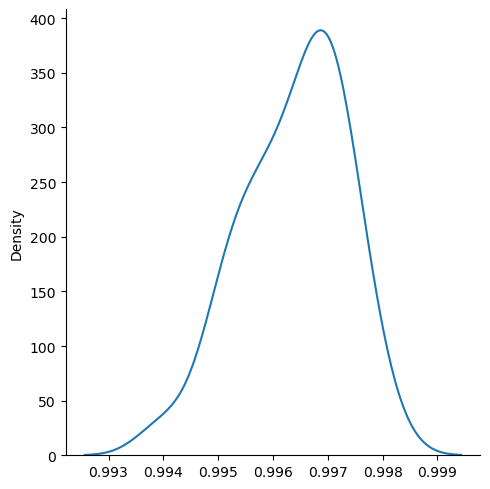

In [67]:
sns.displot(resultados_rede, kind='kde')

In [ ]:
### teste ANOVA

In [68]:
from scipy.stats import f_oneway

In [69]:
p=f_oneway(resultados_arvore,resultados_rede,resultados_random_forest)

In [74]:
p[1]

1.8010022391541973e-46

In [75]:
alpha = 0.05
if p[1] <= alpha:
    print('Hipotese nula rejeitada. Dados são diferentes')
else:
    print('Hipotese alternativa rejeitada.Resultados são iguais')

Hipotese nula rejeitada. Dados são diferentes


In [79]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_rede]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [81]:
resultados_df = pd.DataFrame(resultados_algoritmos)

In [82]:
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9855,arvore
2,0.9905,arvore
3,0.9880,arvore
4,0.9880,arvore
...,...,...
85,0.9955,rede_neural
86,0.9970,rede_neural
87,0.9960,rede_neural
88,0.9965,rede_neural


In [83]:
from statsmodels.stats.multicomp import MultiComparison

In [84]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'],resultados_df['algoritmo'])

In [85]:
teste_estatistico=compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
       arvore random_forest  -0.0001 0.9807 -0.0009 0.0008  False
       arvore   rede_neural   0.0091    0.0  0.0083   0.01   True
random_forest   rede_neural   0.0092    0.0  0.0084 0.0101   True
-----------------------------------------------------------------


In [ ]:
#Salvar um classificador já treinado

In [87]:
import pickle
with open ('C:/Users/Jardi/Documents/Cursos/Machine Learning/recursos do curso/Bases de dados/credit.pkl','rb') as f:
    x_credit_treinamento,y_credit_treinamento,x_credit_teste,y_credit_teste = pickle.load(f)

In [89]:
import numpy as np

In [90]:
x_credit = np.concatenate((x_credit_treinamento,x_credit_teste),axis=0)
y_credit = np.concatenate((y_credit_treinamento,y_credit_teste),axis=0)

In [91]:
x_credit.shape

(2000, 3)

In [92]:
y_credit.shape

(2000,)

In [95]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [97]:
classificador_rede_neural = MLPClassifier(activation='relu',batch_size=56,solver='adam')
classificador_rede_neural.fit(x_credit, y_credit)

C:\Users\Jardi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [99]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1,min_samples_split=5,splitter='best')
classificador_arvore.fit(x_credit,y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [144]:
classificador_svm = SVC(C=2.0,kernel='rbf',probability=True)
classificador_svm.fit(x_credit,y_credit)

SVC(C=2.0, probability=True)

In [145]:
import pickle
pickle.dump(classificador_rede_neural, open('C:/Users/Jardi/Documents/Cursos/Machine Learning/Pratica/rede_neural_finalizado.sav','wb'))
pickle.dump(classificador_arvore, open('C:/Users/Jardi/Documents/Cursos/Machine Learning/Pratica/arvore_finalizado.sav','wb'))
pickle.dump(classificador_svm, open('C:/Users/Jardi/Documents/Cursos/Machine Learning/Pratica/svm_finalizado.sav','wb'))

In [146]:
#Carregar um classificador já treinado

In [147]:
rede_neural = pickle.load(open('C:/Users/Jardi/Documents/Cursos/Machine Learning/Pratica/rede_neural_finalizado.sav','rb'))
arvore = pickle.load(open('C:/Users/Jardi/Documents/Cursos/Machine Learning/Pratica/arvore_finalizado.sav','rb'))
svm = pickle.load(open('C:/Users/Jardi/Documents/Cursos/Machine Learning/Pratica/svm_finalizado.sav','rb'))

In [148]:
novo_registro = x_credit[0]

In [149]:
novo_registro

array([-1.3754462 ,  0.50631087,  0.10980934])

In [150]:
novo_registro=novo_registro.reshape(1,-1)

In [151]:
novo_registro.shape

(1, 3)

In [152]:
rede_neural.predict(novo_registro)

array([0], dtype=int64)

In [153]:
arvore.predict(novo_registro)

array([0], dtype=int64)

In [154]:
svm.predict(novo_registro)

array([0], dtype=int64)

In [155]:
resposta_rede_neural=rede_neural.predict(novo_registro)
resposta_arvore=arvore.predict(novo_registro)
resposta_svm=svm.predict(novo_registro)

In [156]:
resposta_arvore[0],resposta_rede_neural[0],resposta_svm[0]

(0, 0, 0)

In [157]:
paga=0
nao_paga=0

if resposta_rede_neural[0]==1:
    nao_paga +=1
else:
    paga+=1


if resposta_arvore[0]==1:
    nao_paga +=1
else:
    paga+=1

if resposta_svm[0]==1:
    nao_paga +=1
else:
    paga+=1

if paga > nao_paga:
    print('Cliente pagará o empréstimo')
elif paga==nao_paga:
    print('Empate')
else:
    print('Cliente')

Cliente pagará o empréstimo


In [158]:
####Rejeição de Classificadores

In [159]:
resposta_rede_neural[0],resposta_arvore[0],resposta_svm[0]

(0, 0, 0)

In [160]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

array([[1.00000000e+00, 1.22346688e-16]])

In [161]:
confianca_rede_neural=probabilidade_rede_neural.max()
confianca_rede_neural

0.9999999999999999

In [162]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
probabilidade_arvore

array([[1., 0.]])

In [163]:
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [164]:
probabilidade_svm = svm.predict_proba(novo_registro)
probabilidade_svm

array([[9.99998426e-01, 1.57424645e-06]])

In [165]:
confianca_svm = probabilidade_svm.max()
confianca_svm

0.9999984257535546

In [167]:
paga=0
nao_paga=0
confianca_minima=0.999999
algoritmos=0

if confianca_rede_neural >= confianca_minima:
    algoritmos+=1
    if resposta_rede_neural[0]==1:
        nao_paga +=1
    else:
        paga+=1


if confianca_arvore >= confianca_minima:
    algoritmos+=1
    if resposta_arvore[0]==1:
        nao_paga +=1
    else:
        paga+=1
        
if confianca_svm >= confianca_minima:
    algoritmos+=1
    if resposta_svm[0]==1:
        nao_paga +=1
    else:
        paga+=1

if paga > nao_paga:
    print('Cliente pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))
elif paga==nao_paga:
    print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
        print('Cliente não pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))

Cliente pagará o empréstimo, baseado em 2 algoritmos
